# INITIALIZE

In [2]:
# IMPORT STUFF
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)


# matplotlib
import matplotlib.pyplot as plt
print('matplotlib: %s' % plt)
from mpl_toolkits import mplot3d
import seaborn as sns



import time
# pandas
import pandas as pd
print('pandas: %s' % pd.__version__)
# statsmodels

import statsmodels as md
print('statsmodels: %s' % md.__version__)
# scikit-learn



import sklearn as sk
print('sklearn: %s' % sk.__version__)

import requests

import urllib.request
import ssl

import os
print(os.path.abspath(os.getcwd()))


scipy: 1.4.1
numpy: 1.19.5
matplotlib: <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
pandas: 1.1.5
statsmodels: 0.10.2
sklearn: 0.22.2.post1
/content


# IMPORT DATA TABLE

In [4]:
url = 'https://raw.githubusercontent.com/luisjexp/prjAKSHITA/statewide_anova/aksDATA/TT_statewide_gcollab.csv'
tt = pd.read_csv(url)
print(tt.head(5))
print(tt.tail(5))





          Time  wht_git_case_count_cum  ...  wht_epiestimR  ntv_epiestimR
0  27-Feb-2020                     NaN  ...            NaN            NaN
1  28-Feb-2020                     NaN  ...            NaN            NaN
2  29-Feb-2020                     NaN  ...            NaN            NaN
3  01-Mar-2020                     NaN  ...            NaN            NaN
4  02-Mar-2020                     NaN  ...            NaN            NaN

[5 rows x 99 columns]
            Time  wht_git_case_count_cum  ...  wht_epiestimR  ntv_epiestimR
520  31-Jul-2021                640603.0  ...       1.000072            NaN
521  01-Aug-2021                640603.0  ...       1.000141            NaN
522  02-Aug-2021                640603.0  ...       1.000192            NaN
523  03-Aug-2021                640603.0  ...       1.000224            NaN
524  04-Aug-2021                658519.0  ...       1.000245            NaN

[5 rows x 99 columns]


# The Time Series



## Plot



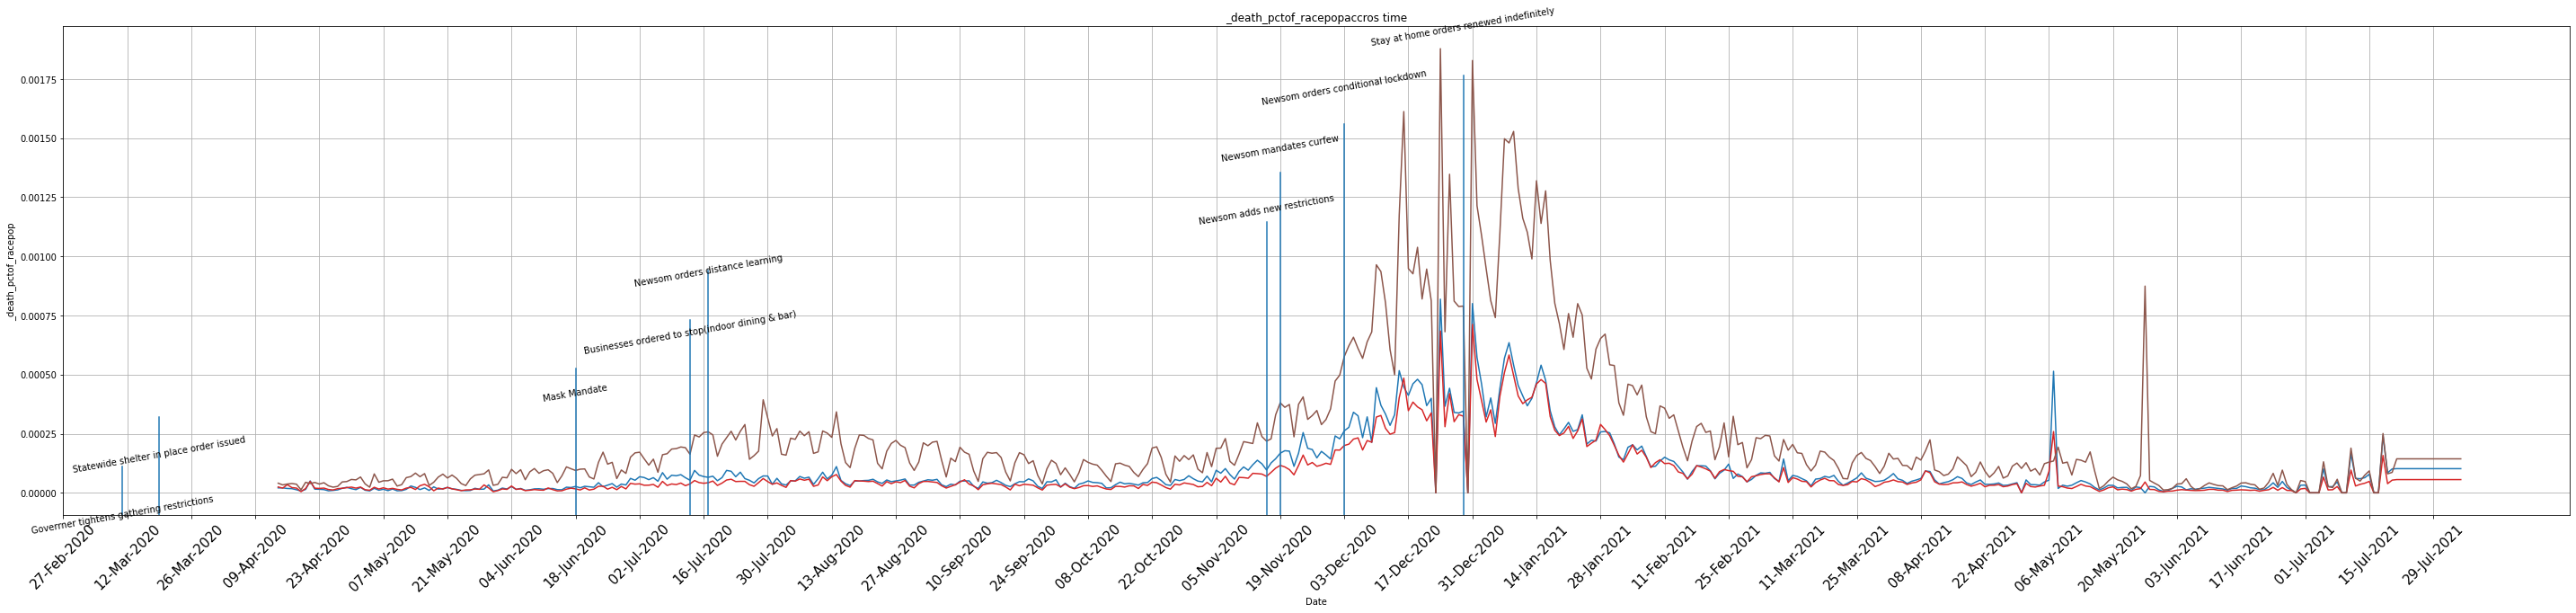

In [ ]:
DV = '_death_pctof_racepop'
date = tt['Time']
r_wht = tt['wht' + DV]
r_asn = tt['asn' + DV]
r_ltn = tt['ltn' + DV]
r_blk = tt['blk' + DV]
r_ntv = tt['ntv' + DV]


npi_idx               = pd.notnull(tt['aks_npi_onset'] )
npi_date_list         = tt['Time'][npi_idx]
npi_description_list  = tt['aks_npi_description'][npi_idx]
npi_number_of         = len(npi_date_list)
pd.concat([npi_date_list, npi_description_list],axis=1)



## Initialize Plot Settings
fig, ax = plt.subplots(1,1, figsize=(50, 10))
ax.set_title(DV + 'accros time')
ax.set_ylabel(DV)
ax.set_xlabel('Date')

# Plot Time Series For Each Race
plt.plot(date, r_wht, color ='tab:blue') 
plt.plot(date, r_asn, color ='tab:red') 
plt.plot(date, r_ltn, color ='tab:brown') 

day_idx = np.arange(0,len(date), 14)
ax.set_xticks(day_idx)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.xticks(rotation = 45)
plt.grid(True)

# Draw lines at the the onset day of an NPI
y_min, y_max = ax.get_ylim()
npi_lineheight_unit_ax    = np.linspace(.1, .9 , npi_number_of)
npi_lineheight_unit_data  = np.linspace(y_min, y_max , npi_number_of)

for k, day in enumerate(npi_date_list):
  lineheight_unit_ax    = npi_lineheight_unit_ax[k]
  lineheight_unit_data  = npi_lineheight_unit_data[k]
  npi_description       = npi_description_list.iloc[k]

  plt.axvline(x = day, ymin=0, ymax= lineheight_unit_ax )
  plt.text(day, lineheight_unit_data, npi_description,
           fontdict=None,
           horizontalalignment='center',
           verticalalignment='center',
           rotation=10)
  

plt.show()

# Analysis

[Text(0, 0, 'wht'), Text(0, 0, 'ltn'), Text(0, 0, 'asn')]

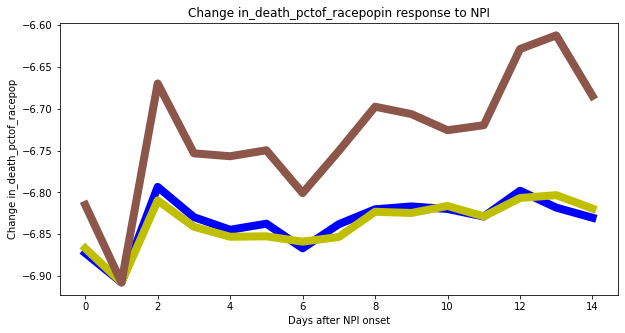

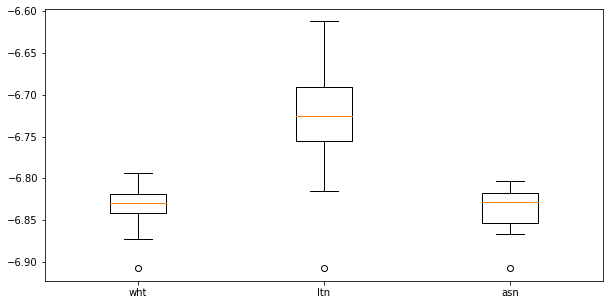

In [5]:
DV = '_death_pctof_racepop'
date = tt['Time']

npi_idx               = pd.notnull(tt['aks_npi_onset'] )
npi_idx = np.where( tt['aks_npi_onset'] == 1)[0]
npi_date_list         = tt['Time'][npi_idx]
npi_description_list  = tt['aks_npi_description'][npi_idx]
npi_number_of         = len(npi_date_list)
pd.concat([npi_date_list, npi_description_list],axis=1)


# Initialize Temporal Response Array
npi_number_of     = len(npi_date_list)
window            = 15

races_number_of   = 3
dR_wht = np.zeros((window,npi_number_of))
dR_asn = np.zeros((window,npi_number_of))
dR_ltn = np.zeros((window,npi_number_of))

# Process
for i, k in enumerate(npi_idx):
  r_wht = tt['wht' + DV][k:k+window]  
  r_asn = tt['asn' + DV][k:k+window]  
  r_ltn = tt['ltn' + DV][k:k+window]  
  

  dR_wht[:,i] =  r_wht - r_wht[k] 
  dR_asn[:,i] =  r_asn - r_asn[k] 
  dR_ltn[:,i] =  r_ltn - r_ltn[k] 


# Collapse Accross NPIs
dR_wht = np.nanmean(dR_wht, axis=1) 
dR_asn = np.nanmean(dR_asn, axis=1) 
dR_ltn = np.nanmean(dR_ltn, axis=1) 

# Convert to log of difference
dR_wht = dR_wht + .001 - np.nanmin(dR_wht)
dR_asn = dR_asn + .001 - np.nanmin(dR_asn)
dR_ltn = dR_ltn + .001 - np.nanmin(dR_ltn)

dR_wht = np.log( dR_wht )
dR_asn = np.log( dR_asn )
dR_ltn = np.log( dR_ltn )

# VISUALIZING
fig2, ax2 = plt.subplots(1,1, figsize=(10,5))
ax2.set_title('Change in' + DV + 'in response to NPI')
ax2.set_ylabel('Change in'+ DV)
ax2.set_xlabel('Days after NPI onset')

plt_col_wht = 'b'
plt_col_asn = 'y'
plt_col_ltn = 'tab:brown'


# Temporal Response Series For Each Race
plt.plot(dR_wht, color = plt_col_wht, linewidth = 8, label= 'wht') 
plt.plot(dR_asn, color = plt_col_asn,linewidth = 8, label='asn') 
plt.plot(dR_ltn, color = plt_col_ltn,linewidth = 8, label= 'ltn' )  

# # Plot BOX PLOTS
fig2, ax2 = plt.subplots(1,1, figsize=(10,5))
plt.boxplot([dR_wht, dR_ltn, dR_asn])
ax2.set_xticklabels(['wht', 'ltn', 'asn'])


#

In [ ]:
#  ANOVA
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(dR_wht, dR_asn, dR_ltn)
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


# NEED TO CONVERT TO DATA TABLE WITH DUMMAY VARS 
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.



22.76875595662011 2.0051964667100996e-07
